## Linear Regression을 이용한 보스턴 주택 가격 예측

dataset : skelarn에 내장되어있는 load_boston 모듈 사용

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from scipy import stats
%matplotlib inline

## 1. 데이터 로드

In [7]:
b_data = load_boston()
# DataFrame으로 변환
b_df = pd.DataFrame(b_data.data, columns = b_data.feature_names)
#target값 추가
b_df['PRICE'] = b_data.target

print("boston DataFrame 크기: ", b_df.shape)
b_df.head(10)

boston DataFrame 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* PRICE : 주택의 가격 (단위 :)

### 피처들을 시각화해서 살펴보고 가장 회귀 결과에 영향을 미치는 피처를 선별

* regplot을 사용해 선형회귀직선과 산점도를 한번에 시각화 한다.

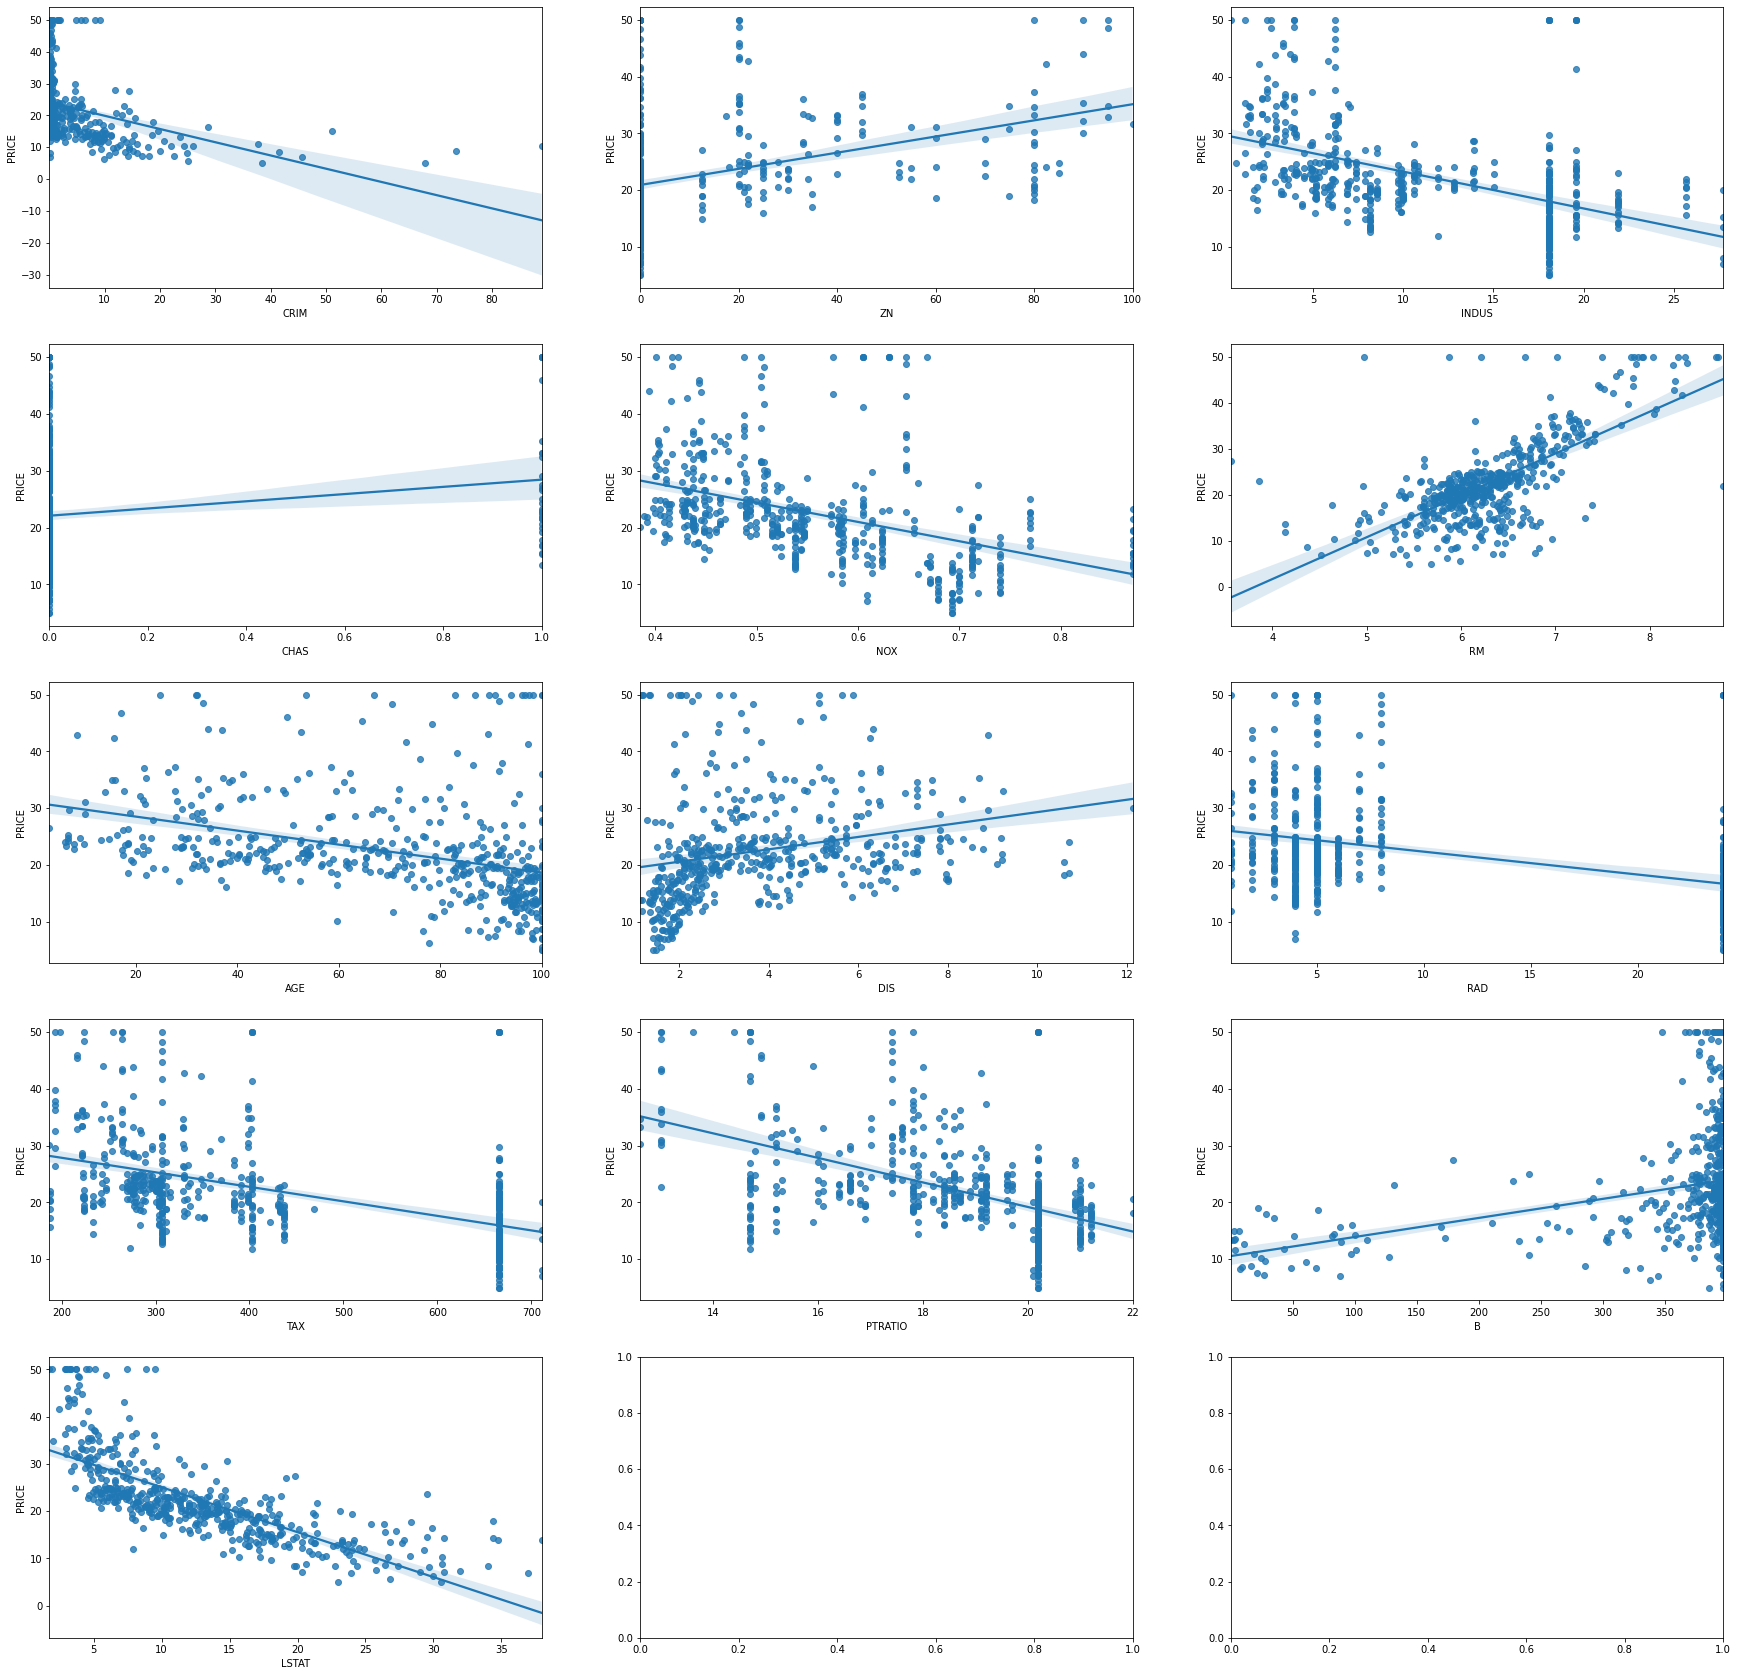

In [30]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x4개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(30,30) , ncols=3 , nrows=5)

# feature_names 갖고옴.

lm_features = b_data.feature_names

for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=b_df , ax=axs[row][col])

* 다른 칼럼보다 RM과 LSTAT의 영향이 가장 두드러 진다. 

## 2. 선형회귀 모델 학습/예측/평가

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Y = b_df['PRICE']  # target
X = b_df.drop(['PRICE'], axis = 1, inplace = False)  # feature

# 테스트셋과 학습셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

#회귀모델 생성/학습/예측
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

#평가방법 : MSE 오차제곱합, RMSE MES에 루트
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 25.014 , RMSE : 5.001
Variance score : 0.726


In [21]:
print('절편 값:',lr.intercept_)
print('피처  ', b_data.feature_names)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 32.60038420958524
피처   ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
회귀 계수값: [ -0.1   0.    0.    2.7 -19.    4.1   0.   -1.3   0.4  -0.   -0.9   0.
  -0.5]


In [24]:
# 피처별 회귀계수 pd.series로 변환
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X.columns)
coeff.sort_values(ascending= False)

RM          4.1
CHAS        2.7
RAD         0.4
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.3
NOX       -19.0
dtype: float64

In [31]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X, Y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
